ML Project - Bank Marketing Prediction.

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() # By default seaborn theme, scaling, and color palette

import os
os.getcwd()

'C:\\Users\\Pushkar Choudhary'

In [2]:
# Reading from CSV
df= pd.read_csv(r"C:\Users\Pushkar Choudhary\Documents\bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Checking data_types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


Hence dataset does not contain any missing value.

In [4]:
# Checking shape : Total number of rows and columns
df.shape

(45211, 19)

In [5]:
# Checking Unique values 
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [6]:
# Checking duplicates
df[df.duplicated()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [7]:
# Checking missing values
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [8]:
Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

Object `values` not found.


Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values

In [9]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

If we purely look at numerical summary ie mean and standard deviation, we can't see that lot of values is -1. We can see that 75% values of pdays are -1. So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

In [10]:
print('Mean is',df['pdays'].mean())
print('Median is',df['pdays'].median())
print('Mode is',df['pdays'].mode()[0])

Mean is 40.19782796222158
Median is -1.0
Mode is -1


Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?
pdays uses -1 as indicator and not value. Hence treat these value as missing

Ignore these values in our average/median/state calculations. Keep it NaN Wherever pdays is -1, replace with NaN

In [11]:
# Since for relevant pdays, need to drop -1
df1=df.copy()
df1.drop(df1[df1['pdays'] < 0].index, inplace = True) 
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

In [13]:
print('Mean is',df1['pdays'].mean())
print('Median is',df1['pdays'].median())
print('Mode is',df1['pdays'].mode()[0])

Mean is 224.57769165556496
Median is 194.0
Mode is 182


Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?¶

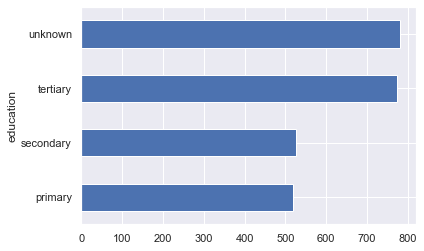

Unknown has highest median 782.0


In [14]:
df2 = df1.groupby(['education']).median()['balance']
df2.plot(kind='barh')
plt.show()

print('Unknown has highest median',df2.max())


Thus, we can conclude from graph that customer with unknown level of education has highest median value for balance.

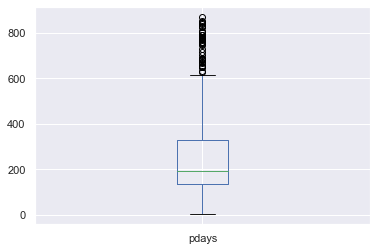

In [15]:
# Make a box plot for pdays. Do you see any outliers?

df1.pdays.plot.box()
plt.show()

Yes, from the above box plot we can see that there are outliers present in pdays.

Boxplot with no Outliers


H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


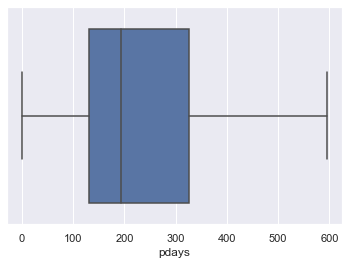

In [16]:
# Handling the Outliers
df2 = df1[df1['pdays'] >= 600]
df1 = df1.drop(df2.index,axis=0)

print('Boxplot with no Outliers')

sns.boxplot(df1['pdays'])
plt.show()

In [17]:
# Resultant New Data after filtering out ouliers & -1 pdays
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8205 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8205 non-null   int64 
 1   job        8205 non-null   object
 2   salary     8205 non-null   int64 
 3   marital    8205 non-null   object
 4   education  8205 non-null   object
 5   targeted   8205 non-null   object
 6   default    8205 non-null   object
 7   balance    8205 non-null   int64 
 8   housing    8205 non-null   object
 9   loan       8205 non-null   object
 10  contact    8205 non-null   object
 11  day        8205 non-null   int64 
 12  month      8205 non-null   object
 13  duration   8205 non-null   int64 
 14  campaign   8205 non-null   int64 
 15  pdays      8205 non-null   int64 
 16  previous   8205 non-null   int64 
 17  poutcome   8205 non-null   object
 18  response   8205 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


#The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable. #Bi-Variate Analysis. #EDA Convert the response variable to a convenient form.

In [18]:
df1.response.value_counts(normalize=True)

no     0.77014
yes    0.22986
Name: response, dtype: float64

In [19]:
df1.response.value_counts()

no     6319
yes    1886
Name: response, dtype: int64

Make suitable plots for associations with numerical features and categorical features

In [20]:
# here we are seperating object and numerical data types 
cols = df1.columns.to_list()
num_cols= df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Columns
['default', 'loan', 'response', 'poutcome', 'marital', 'contact', 'education', 'housing', 'targeted', 'job', 'month']


H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


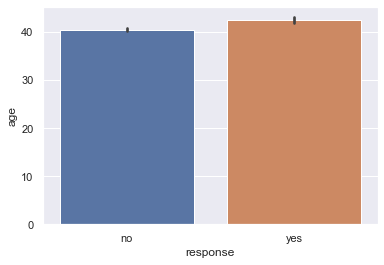

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


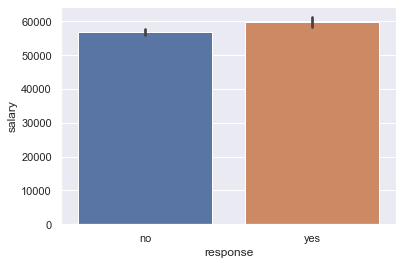

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


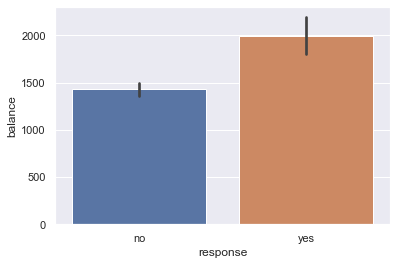

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


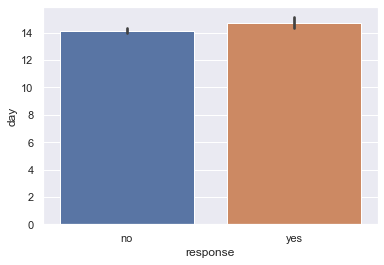

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


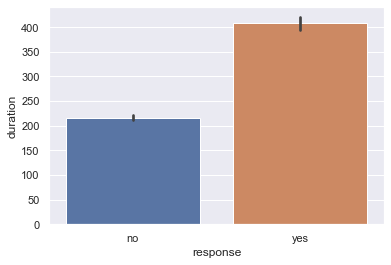

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


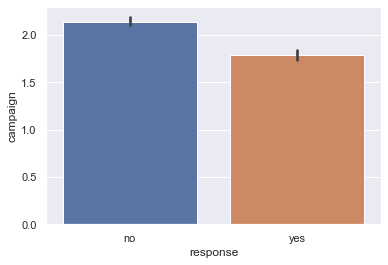

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


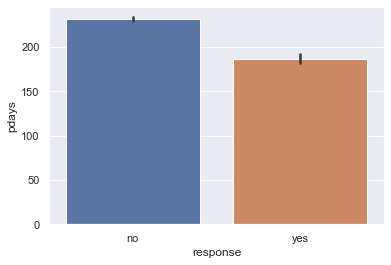

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


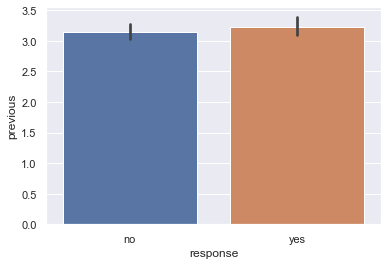

In [21]:
#Visualizing Numerical Features with Response

for i in df1[num_cols]:
    sns.barplot(df1['response'],df1[i])
    plt.show()

job
admin.           13.199269
blue-collar      19.561243
entrepreneur      2.742230
housemaid         1.840341
management       22.023157
retired           5.935405
self-employed     3.424741
services          8.592322
student           3.473492
technician       16.258379
unemployed        2.559415
unknown           0.390006
dtype: float64


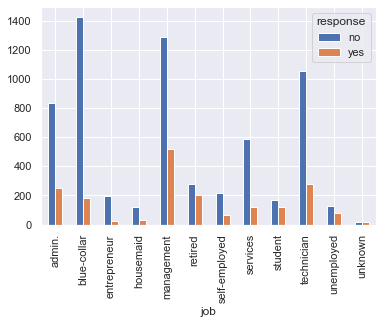

In [22]:
# Visualizing Categorical Features with Response

# job
temp1 = pd.crosstab(df1['job'], df1['response'])
temp1.plot(kind='bar')
print(df1.groupby(['job']).size()/len(df1)*100)

marital
divorced    11.261426
married     57.416210
single      31.322364
dtype: float64


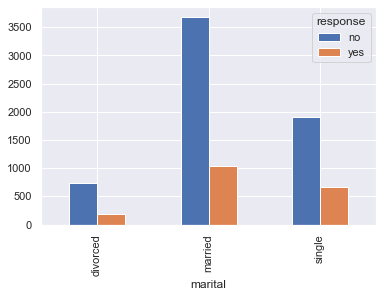

In [23]:
# marital
temp2 = pd.crosstab(df1['marital'], df1['response'])
temp2.plot(kind='bar')
print(df1.groupby(['marital']).size()/len(df1)*100)

education
primary      12.394881
secondary    51.541743
tertiary     32.151127
unknown       3.912249
dtype: float64


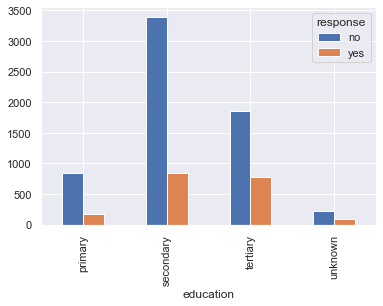

In [24]:
# education
temp3 = pd.crosstab(df1['education'], df1['response'])
temp3.plot(kind='bar')
print(df1.groupby(['education']).size()/len(df1)*100)

default
no     99.305302
yes     0.694698
dtype: float64


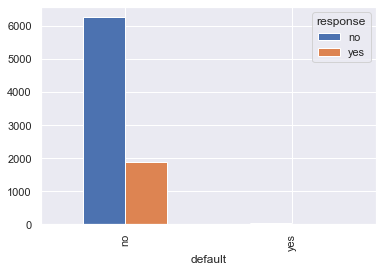

In [25]:
# default
temp4 = pd.crosstab(df1['default'], df1['response'])
temp4.plot(kind='bar')
print(df1.groupby(['default']).size()/len(df1)*100)

housing
no     37.659963
yes    62.340037
dtype: float64


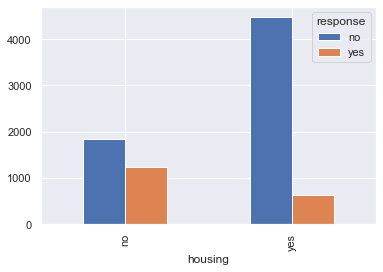

In [26]:
# housing
temp5 = pd.crosstab(df1['housing'], df1['response'])
temp5.plot(kind='bar')
print(df1.groupby(['housing']).size()/len(df1)*100)

contact
cellular     91.736746
telephone     7.666057
unknown       0.597197
dtype: float64


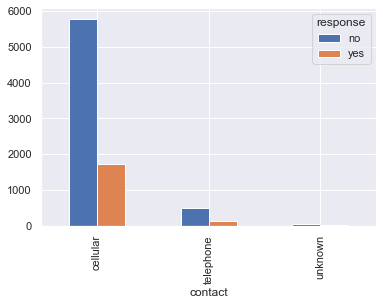

In [27]:
# "contact"
temp6 = pd.crosstab(df1['contact'], df1['response'])
temp6.plot(kind='bar')
print(df1.groupby(['contact']).size()/len(df1)*100)

month
apr    13.589275
aug     6.386350
dec     1.438147
feb    11.249238
jan     6.069470
jul     3.010360
jun     3.851310
mar     2.096283
may    30.627666
nov    14.003656
oct     4.070689
sep     3.607556
dtype: float64


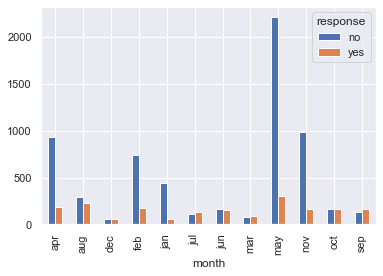

In [28]:
# "month"
temp7 = pd.crosstab(df1['month'], df1['response'])
temp7.plot(kind='bar')
print(df1.groupby(['month']).size()/len(df1)*100)

poutcome
failure    59.305302
other      22.242535
success    18.391225
unknown     0.060938
dtype: float64


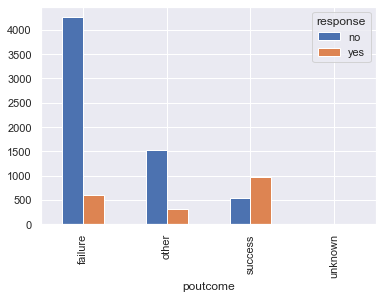

In [29]:
# "poutcome"
temp8 = pd.crosstab(df1['poutcome'], df1['response'])
temp8.plot(kind='bar')
print(df1.groupby(['poutcome']).size()/len(df1)*100)

loan
no     86.410725
yes    13.589275
dtype: float64


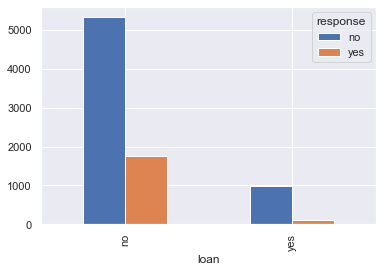

In [30]:
# "loan"
temp9 = pd.crosstab(df1['loan'], df1['response'])
temp9.plot(kind='bar')
print(df1.groupby(['loan']).size()/len(df1)*100)

#Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'

#The -1 pdays or missing values or outliers are filtered out as we would not be using that in Modelling

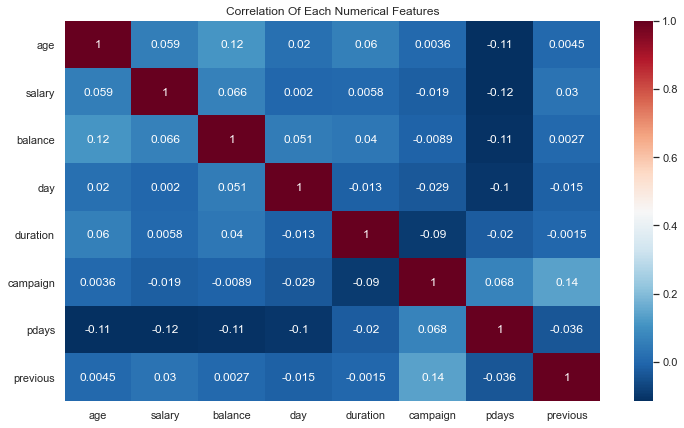

In [31]:
#The necessary transformations for the categorical variables and the numeric variables
# Correlation Matrix on Resultant Data
plt.figure(figsize=(12,7))
corr = df1.corr()
sns.heatmap(corr,annot=True,cmap= 'RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

#we can see that duration variable is highly correlated with response variable 'Response Flag'. #Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

Label Encoding of Categorical Variables.

In [32]:
from sklearn.preprocessing import LabelEncoder
df2 = df1[cat_cols].apply(LabelEncoder().fit_transform)

In [33]:
df2.head()

,default,loan,response,poutcome,marital,contact,education,housing,targeted,job,month
24060,0,0,0,0,1,1,2,0,1,0,10
24062,0,1,1,1,2,1,1,1,1,0,10
24064,0,0,1,0,1,1,1,1,1,7,10
24072,0,0,0,1,1,1,2,1,1,4,10
24077,0,0,1,0,1,1,2,1,1,4,10


In [34]:
df3 = df2.join(df1[num_cols])
df3.head()

,default,loan,response,poutcome,marital,contact,education,housing,targeted,job,month,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,0,0,0,1,1,2,0,1,0,10,33,50000,882,21,39,1,151,3
24062,0,1,1,1,2,1,1,1,1,0,10,42,50000,-247,21,519,1,166,1
24064,0,0,1,0,1,1,1,1,1,7,10,33,70000,3444,21,144,1,91,4
24072,0,0,0,1,1,1,2,1,1,4,10,36,100000,2415,22,73,1,86,4
24077,0,0,1,0,1,1,2,1,1,4,10,36,100000,0,23,140,1,143,3


In [35]:
df3.corr()

,default,loan,response,poutcome,marital,contact,education,housing,targeted,job,month,age,salary,balance,day,duration,campaign,pdays,previous
default,1.000000,0.052473,-0.028256,-0.025767,-0.005753,-0.019521,-0.013600,0.022611,0.019620,-0.021111,0.020435,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505
loan,0.052473,1.000000,-0.115212,-0.103648,-0.055374,-0.028964,-0.048812,0.112240,0.070190,-0.033795,-0.000715,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683
response,-0.028256,-0.115212,1.000000,0.425229,0.049751,-0.007714,0.108581,-0.320280,-0.092791,0.079660,-0.009015,0.072784,0.038064,0.077127,0.030070,0.342049,-0.094356,-0.173773,0.008075
poutcome,-0.025767,-0.103648,0.425229,1.000000,0.045484,0.024316,0.083959,-0.287046,-0.071648,0.066452,-0.018198,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900
marital,-0.005753,-0.055374,0.049751,0.045484,1.000000,-0.028908,0.122070,-0.056352,-0.255486,0.072865,-0.024663,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519
contact,-0.019521,-0.028964,-0.007714,0.024316,-0.028908,1.000000,-0.050515,-0.072051,0.024672,0.000723,0.041944,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374
education,-0.013600,-0.048812,0.108581,0.083959,0.122070,-0.050515,1.000000,-0.127906,-0.632761,0.159377,-0.012213,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963
housing,0.022611,0.112240,-0.320280,-0.287046,-0.056352,-0.072051,-0.127906,1.000000,0.086574,-0.132182,0.017032,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706
targeted,0.019620,0.070190,-0.092791,-0.071648,-0.255486,0.024672,-0.632761,0.086574,1.000000,-0.091083,0.011374,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387
job,-0.021111,-0.033795,0.079660,0.066452,0.072865,0.000723,0.159377,-0.132182,-0.091083,1.000000,-0.002806,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903


Logistic Regression Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
X = df3.drop("response", axis=1)
X.head()

,default,loan,poutcome,marital,contact,education,housing,targeted,job,month,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,0,0,1,1,2,0,1,0,10,33,50000,882,21,39,1,151,3
24062,0,1,1,2,1,1,1,1,0,10,42,50000,-247,21,519,1,166,1
24064,0,0,0,1,1,1,1,1,7,10,33,70000,3444,21,144,1,91,4
24072,0,0,1,1,1,2,1,1,4,10,36,100000,2415,22,73,1,86,4
24077,0,0,0,1,1,2,1,1,4,10,36,100000,0,23,140,1,143,3


In [39]:
y=df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)    

0.7783370562666023

In [44]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1290
           1       0.56      0.23      0.32       351

    accuracy                           0.80      1641
   macro avg       0.69      0.59      0.60      1641
weighted avg       0.76      0.80      0.76      1641



In [45]:
confusion_matrix(y_pred,y_test)

array([[1228,  272],
       [  62,   79]], dtype=int64)

In [46]:
f1_score(y_pred,y_test)

0.32113821138211385

RFE

In [47]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [48]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False])

In [49]:
X_train.columns[rfe.support_]

Index(['default', 'loan', 'poutcome', 'contact', 'housing'], dtype='object')

In [50]:
cols = X_train.columns[rfe.support_]

In [51]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [52]:
y_pred2 = lr.predict(X_test[cols])

In [53]:
f1_score(y_pred2,y_test)

0.5402504472271914

In [54]:
confusion_matrix(y_pred2,y_test)

array([[1233,  200],
       [  57,  151]], dtype=int64)

use statsmodel

In [55]:
import statsmodels.api as sm

In [56]:
X_train.head()

,default,loan,poutcome,marital,contact,education,housing,targeted,job,month,age,salary,balance,day,duration,campaign,pdays,previous
38117,0,0,1,1,0,0,1,1,1,8,37,20000,357,15,14,2,344,3
44255,0,0,1,1,0,0,0,1,10,5,60,8000,0,22,1193,1,412,1
32375,0,0,2,2,0,2,1,0,9,0,36,60000,470,16,123,3,265,13
26534,0,0,0,0,0,0,1,1,7,9,38,70000,0,20,250,1,155,2
35545,0,0,1,0,0,2,1,0,4,8,36,100000,-252,7,235,2,293,1


Add intercept manually for statsmodel to work

In [57]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()


,const,default,loan,poutcome,contact,housing
38117,1.0,0,0,1,0,1
44255,1.0,0,0,1,0,0
32375,1.0,0,0,2,0,1
26534,1.0,0,0,0,0,1
35545,1.0,0,0,1,0,1


In [58]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [59]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     393.0
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        12:04:03   Log-Likelihood:                -2810.5
No. Observations:                6564   AIC:                             5633.
Df Residuals:                    6558   BIC:                             5674.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2558      0.009     26.961      0.000       0.237       0.274
default       -0.0570      0.058     -0.977      0.328      -0.171       0.057
loan          -0.0711      0.014     -5.219      0.000      -0.098      -0.044
poutcome       0.1925      0.006     31.453      0.000       0.180       0.204
contact       -0.0627      0.015     -4.174      0.000      -0.092      -0.033
housing       -0.1919      0.010    -19.314      0.000      -0.211      -0.172
==============================================================================
Omnibus:                      712.509   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.459
Skew:                           0.926   Prob(JB):                    6.13e-210
Kurtosis:                       3.308   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.85
7,targeted,6.48
5,education,6.44
16,pdays,5.82
11,salary,5.34
3,marital,4.45
13,day,4.15
9,month,3.61
6,housing,3.27
15,campaign,2.87


Housing, loan, default, poutcome are imp feature from logistic regression model perspective

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [66]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.840188871138521

In [67]:
y_pred1 = rfc.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1290
           1       0.75      0.47      0.58       351

    accuracy                           0.85      1641
   macro avg       0.81      0.71      0.74      1641
weighted avg       0.84      0.85      0.84      1641



In [69]:
f1_score(y_test,y_pred1)

0.5764499121265378

In [70]:
confusion_matrix(y_test,y_pred1)

array([[1236,   54],
       [ 187,  164]], dtype=int64)

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred1)

0.7126880010600941

RFE

In [72]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [73]:
rfe1.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False])

In [74]:
X_train.columns[rfe1.support_]

Index(['poutcome', 'housing', 'month', 'duration', 'pdays'], dtype='object')

In [75]:
cols = X_train.columns[rfe1.support_]

In [76]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [77]:
y_pred3 = rfc.predict(X_test[cols])

In [78]:
f1_score(y_pred3,y_test)

0.6056572379367721

In [79]:
confusion_matrix(y_pred3,y_test)

array([[1222,  169],
       [  68,  182]], dtype=int64)

Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.